# Data
The data consists of fluorescence spectra readings from six different species of bacteria: Bacillus cereus, Listeria monocytogenes, Staphylococcus aureus, Salmonella enterica, Escherichia coli, and Pseudomonas aureginosa.
For each bacteria sample there are spectra readings for about 1043 different wavelengths of light and the three growth phases: lag, log, and stat (stationary). This means that for each bacteria sample there are 3 * 1304 data points. Furthermore, the spectra readings are generated with two different integration times (time spent gathering the spectra reading), 16ms and 32ms. 

The labels (or targets) are set to be the 'gram-ness' of the given bacteria sample, i.e. whether or not the given bacteria would test positive in the [gram stain test](https://en.wikipedia.org/wiki/Gram_stain). These groupings for the bacteria in the dataset are:

- Gram positive
    - Bc - Bacillus cereus 
    - lm - Listeria monocytogenes
    - sa - Staphylococcus aureus 

- Gram negative
    - se - Salmonella enterica
    - ec - Escherichia coli
    - pa - Pseudomonas aureginosa

# Models
The models used in the following experiments are:
1. Naive Bayes
2. SVM
3. RandomForest with Decision Stumps
4. RandomForest with Decision Trees
5. AdaBoost with Decision Stumps
6. AdaBoost with Decision Trees
7. XGBoost
7. Convolutional Neural Network.

# Methodology
In the code below an experiment refers to a sequence of tests which evaluate the performance of various models. An experiment is run for the entire dataset and again for each subset of the dataset, where a subset is simply the data from a single growth phase. In each experiment I run the same series of tests twice, once for each integration time. 

Each model is evaluated using both the original, untransformed data and a PCA transformed version of the data. Models are evaluated using repeated stratified k-fold cross validation where the data is split into three folds (n_splits) 20 times (n_repeats). The scores given for both the untransformed data and the PCA data consist of the mean score over all the 60 indvidual folds +/- two standard deviations.

The results are a bit hard to read from the text output so the results are summarised at the end in a table and bar chart for each experiment. The CNN scores using the PCA data are all zero because the CNN model is not tested on the PCA transformed data. The numbers on the bars in the bar chart show the height of the bars (the mean classification score) and the black lines show the +/- two standard deviations range. 

The code for these experiments can be found under the file `experiment.py`.

More details about the data, models, and methodology can be found in the file `README.md`.

In [1]:
from experiments.cnn import CNNGramnessExperiment as GramnessExperiment

In [2]:
experiment_lag = GramnessExperiment('lag', n_jobs=4)
experiment_lag.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.69 (+/- 0.20)
PCA Accuracy: 0.66 (+/- 0.21)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1152 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    6.3s finished


Best grid search score was 0.89 with the following settings: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.91 (+/- 0.13)
PCA Accuracy: 0.89 (+/- 0.13)
Elapsed time: 00m 06s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.76 (+/- 0.20)
PCA Accuracy: 0.74 (+/- 0.16)
Elapsed time: 00m 29s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.75 (+/- 0.21)
PCA Accuracy: 0.74 (+/- 0.19)
Elapsed time: 00m 28s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************
A

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 215 tasks      | elapsed:   43.6s
[Parallel(n_jobs=4)]: Done 465 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 825 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:  3.6min remaining:    1.6s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  3.6min finished


Best grid search score was 0.75 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.70 (+/- 0.22)
PCA Accuracy: 0.75 (+/- 0.21)
Elapsed time: 03m 40s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 10m 15s    
Accuracy: 0.74 +/- 0.18
PCA Accuracy: N/A
Elapsed time: 10m 50s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.69 (+/- 0.18)
PCA Accuracy: 0.67 (+/- 0.21)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1016 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   11.1s finished


Best grid search score was 0.92 with the following settings: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.92 (+/- 0.13)
PCA Accuracy: 0.92 (+/- 0.13)
Elapsed time: 00m 11s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.75 (+/- 0.18)
PCA Accuracy: 0.69 (+/- 0.15)
Elapsed time: 00m 35s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.75 (+/- 0.17)
PCA Accuracy: 0.71 (+/- 0.17)
Elapsed time: 00m 30s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    4.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   16.1s finished


Best grid search score was 0.72 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.73 (+/- 0.20)
PCA Accuracy: 0.72 (+/- 0.20)
Elapsed time: 00m 20s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 07m 46s    
Accuracy: 0.70 +/- 0.17
PCA Accuracy: N/A
Elapsed time: 07m 53s
All tests done.
Elapsed time: 27m 15s


In [3]:
experiment_log = GramnessExperiment('log', n_jobs=4)
experiment_log.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.77 (+/- 0.21)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 2720 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    9.8s finished


Best grid search score was 0.98 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 00m 10s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.90 (+/- 0.15)
Elapsed time: 00m 47s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.94 (+/- 0.11)
Elapsed time: 00m 48s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
*********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   10.9s finished


Best grid search score was 0.98 with the following settings: {'learning_rate': 0.0001, 'max_depth': 1}
Accuracy: 0.85 (+/- 0.16)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 00m 13s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 03m 12s    
Accuracy: 0.97 +/- 0.07
PCA Accuracy: N/A
Elapsed time: 03m 13s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.96 (+/- 0.07)
PCA Accuracy: 0.75 (+/- 0.25)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 4332 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    4.0s finished


Best grid search score was 0.98 with the following settings: {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 00m 04s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.88 (+/- 0.17)
Elapsed time: 00m 32s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.98 (+/- 0.07)
PCA Accuracy: 0.93 (+/- 0.13)
Elapsed time: 00m 45s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
*********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   12.1s finished


Best grid search score was 0.98 with the following settings: {'learning_rate': 0.0001, 'max_depth': 1}
Accuracy: 0.80 (+/- 0.22)
PCA Accuracy: 0.98 (+/- 0.07)
Elapsed time: 00m 17s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 05m 31s    
Accuracy: 0.97 +/- 0.07
PCA Accuracy: N/A
Elapsed time: 05m 33s
All tests done.
Elapsed time: 13m 49s


In [4]:
experiment_stat = GramnessExperiment('stat', n_jobs=4)
experiment_stat.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.91 (+/- 0.13)
PCA Accuracy: 0.74 (+/- 0.24)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 3725 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    5.5s finished


Best grid search score was 0.93 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.93 (+/- 0.11)
PCA Accuracy: 0.93 (+/- 0.11)
Elapsed time: 00m 05s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.92 (+/- 0.12)
PCA Accuracy: 0.81 (+/- 0.16)
Elapsed time: 00m 29s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.92 (+/- 0.12)
PCA Accuracy: 0.85 (+/- 0.15)
Elapsed time: 00m 29s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 212 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 671 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   21.6s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   21.8s finished


Best grid search score was 0.89 with the following settings: {'learning_rate': 0.1, 'max_depth': 2}
Accuracy: 0.89 (+/- 0.11)
PCA Accuracy: 0.89 (+/- 0.13)
Elapsed time: 00m 24s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 07m 21s    
Accuracy: 0.91 +/- 0.13
PCA Accuracy: N/A
Elapsed time: 07m 26s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.92 (+/- 0.12)
PCA Accuracy: 0.79 (+/- 0.16)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 1186 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:   12.1s finished


Best grid search score was 0.93 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.93 (+/- 0.10)
PCA Accuracy: 0.93 (+/- 0.10)
Elapsed time: 00m 13s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.91 (+/- 0.12)
PCA Accuracy: 0.87 (+/- 0.15)
Elapsed time: 00m 56s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.91 (+/- 0.12)
PCA Accuracy: 0.89 (+/- 0.13)
Elapsed time: 00m 53s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 132 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 732 tasks      | elapsed:   11.0s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   14.5s finished


Best grid search score was 0.90 with the following settings: {'learning_rate': 0.1, 'max_depth': 1}
Accuracy: 0.87 (+/- 0.20)
PCA Accuracy: 0.90 (+/- 0.11)
Elapsed time: 00m 19s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 100.
Iteration 60/60 - Epoch 99/100 - Progress: 5999/6000 - Elapsed time: 05m 09s    
Accuracy: 0.92 +/- 0.10
PCA Accuracy: N/A
Elapsed time: 05m 16s
All tests done.
Elapsed time: 17m 54s


In [5]:
experiment_all = GramnessExperiment('all', n_jobs=4)
experiment_all.run()

################################################################################
Running tests for 16ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.95 (+/- 0.10)
PCA Accuracy: 0.75 (+/- 0.25)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 3809 tasks      | elapsed:    2.7s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    5.5s finished


Best grid search score was 0.97 with the following settings: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.97 (+/- 0.07)
Elapsed time: 00m 05s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.85 (+/- 0.15)
Elapsed time: 00m 29s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.90 (+/- 0.12)
Elapsed time: 00m 30s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
**********************************************************************


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  4.3min finished


Best grid search score was 0.92 with the following settings: {'learning_rate': 0.0001, 'max_depth': 1}
Accuracy: 0.83 (+/- 0.20)
PCA Accuracy: 0.92 (+/- 0.12)
Elapsed time: 05m 27s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 600.
Iteration 60/60 - Epoch 599/600 - Progress: 35999/36000 - Elapsed time: 25m 47s 
Accuracy: 0.92 +/- 0.12
PCA Accuracy: N/A
Elapsed time: 26m 13s
################################################################################
Running tests for 32ms integration time.
################################################################################
**************************
Running Naive Bayes tests.
**************************
Accuracy: 0.95 (+/- 0.10)
PCA Accuracy: 0.72 (+/- 0.28)
Elapsed time: 00m 00s
******************
Running SVM tests.
******************
Fitting 60 folds for each of 220 candidates, totalling 13200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 3461 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 13200 out of 13200 | elapsed:    6.1s finished


Best grid search score was 0.97 with the following settings: {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
Accuracy: 0.97 (+/- 0.07)
PCA Accuracy: 0.97 (+/- 0.07)
Elapsed time: 00m 06s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 1.
**************************************************************************
Accuracy: 0.92 (+/- 0.13)
PCA Accuracy: 0.78 (+/- 0.17)
Elapsed time: 00m 29s
**************************************************************************
Running RandomForest tests using 512 Decision Trees with a max depth of 3.
**************************************************************************
Accuracy: 0.93 (+/- 0.13)
PCA Accuracy: 0.93 (+/- 0.13)
Elapsed time: 00m 30s
**********************************************************************
Running AdaBoost tests using 256 Decision Trees with a max depth of 1.
********************************************************************

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:    3.3s
[Parallel(n_jobs=4)]: Done 744 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   22.0s finished


Best grid search score was 0.97 with the following settings: {'learning_rate': 0.0001, 'max_depth': 1}
Accuracy: 0.81 (+/- 0.20)
PCA Accuracy: 0.97 (+/- 0.07)
Elapsed time: 00m 29s
******************
Running CNN tests.
******************
Finding suitable number of epochs.
Number of epochs is 400.
Iteration 60/60 - Epoch 399/400 - Progress: 23999/24000 - Elapsed time: 15m 36s 
Accuracy: 0.93 +/- 0.12
PCA Accuracy: N/A
Elapsed time: 15m 51s
All tests done.
Elapsed time: 51m 24s


Results for Tests Run on Lag Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              32ms                   svm  original       0.92      0.13
1              32ms                   svm       pca       0.92      0.13
2              16ms                   svm  original       0.91      0.13
3              16ms                   svm       pca       0.89      0.13
4              16ms  random_forest_stumps  original       0.76      0.20
5              32ms         random_forest  original       0.75      0.17
6              32ms  random_forest_stumps  original       0.75      0.18
7              16ms         random_forest  original       0.75      0.21
8              16ms               xgboost       pca       0.75      0.21
9              16ms  random_forest_stumps       pca       0.74      0.16
10             16ms                   cnn  original       0.74      0.18
11             16ms         random_forest       pca     

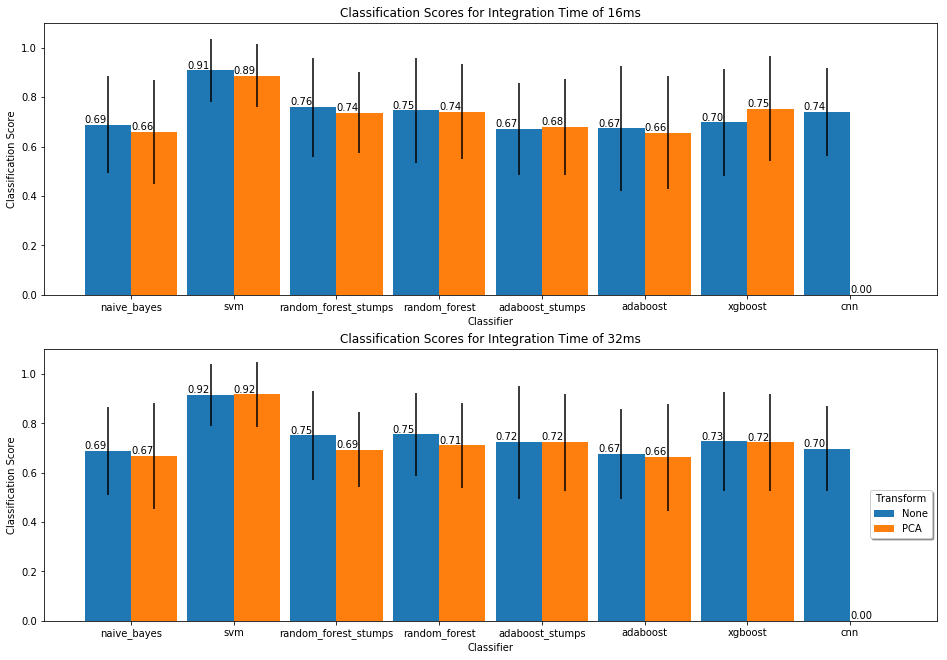

In [6]:
print('Results for Tests Run on Lag Growth Phase Data')

print('Top Configurations:\n', experiment_lag.top_configurations(-1))
experiment_lag.plot_results();

Results for Tests Run on Log Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              16ms                   svm  original       0.98      0.07
1              16ms                   svm       pca       0.98      0.07
2              16ms  random_forest_stumps  original       0.98      0.07
3              16ms         random_forest  original       0.98      0.07
4              16ms              adaboost  original       0.98      0.07
5              16ms               xgboost       pca       0.98      0.07
6              32ms                   svm  original       0.98      0.07
7              32ms                   svm       pca       0.98      0.07
8              32ms  random_forest_stumps  original       0.98      0.07
9              32ms         random_forest  original       0.98      0.07
10             32ms       adaboost_stumps  original       0.98      0.07
11             32ms              adaboost  original     

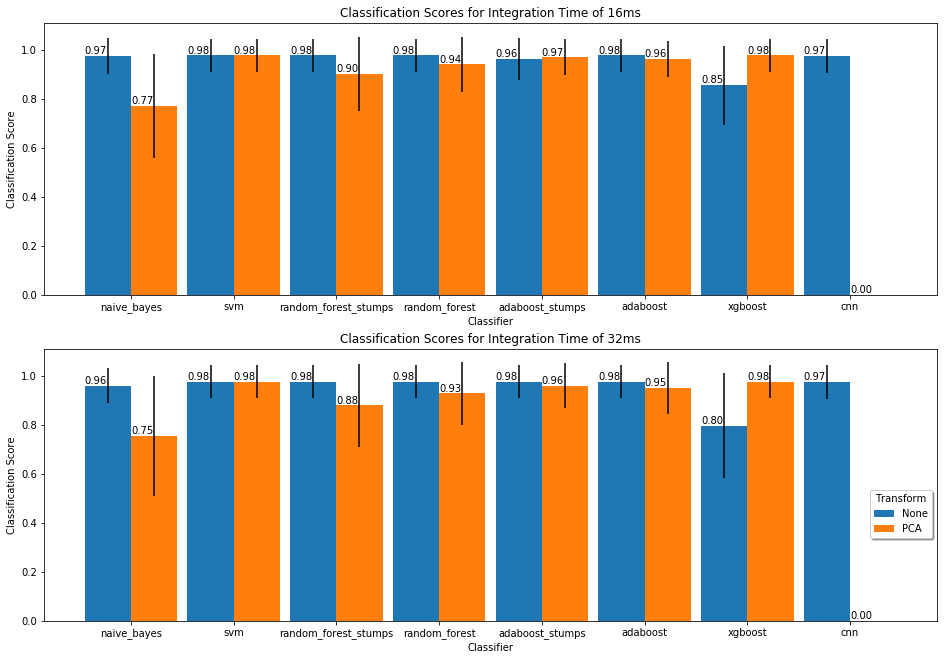

In [7]:
print('Results for Tests Run on Log Growth Phase Data')

print('Top Configurations:\n', experiment_log.top_configurations(-1))
experiment_log.plot_results();

Results for Tests Run on Stationary Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              32ms                   svm  original       0.93      0.10
1              32ms                   svm       pca       0.93      0.10
2              16ms                   svm  original       0.93      0.11
3              16ms                   svm       pca       0.93      0.11
4              32ms                   cnn  original       0.92      0.10
5              16ms  random_forest_stumps  original       0.92      0.12
6              16ms         random_forest  original       0.92      0.12
7              32ms           naive_bayes  original       0.92      0.12
8              32ms  random_forest_stumps  original       0.91      0.12
9              32ms         random_forest  original       0.91      0.12
10             16ms           naive_bayes  original       0.91      0.13
11             16ms                   cnn  origin

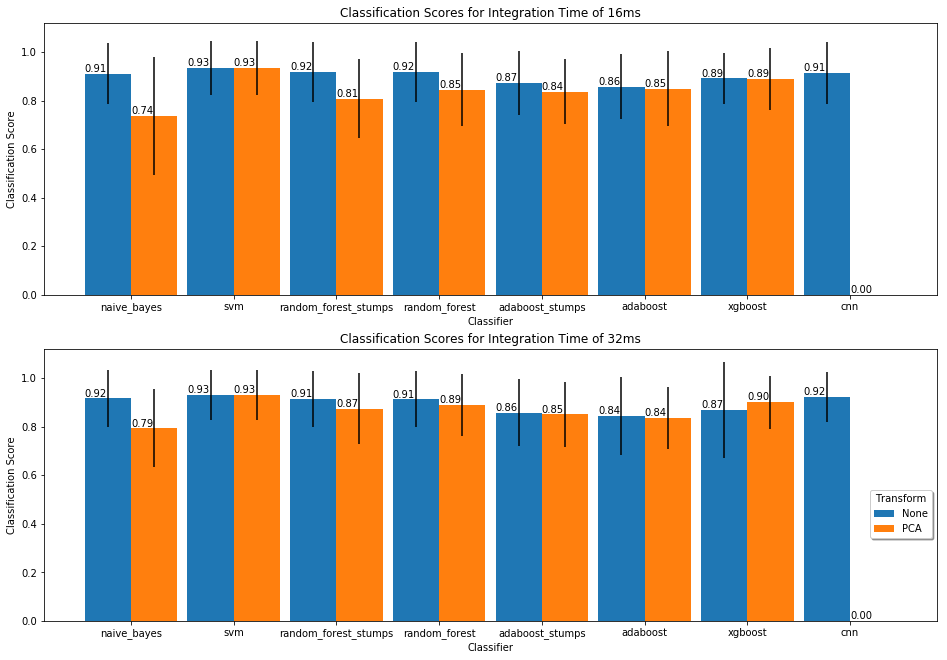

In [8]:
print('Results for Tests Run on Stationary Growth Phase Data')

print('Top Configurations:\n', experiment_stat.top_configurations(-1))
experiment_stat.plot_results();

Results for Tests Run on All Growth Phase Data
Top Configurations:
    integration_time            classifier   dataset mean_score score_std
0              16ms                   svm  original       0.97      0.07
1              16ms                   svm       pca       0.97      0.07
2              32ms                   svm  original       0.97      0.07
3              32ms                   svm       pca       0.97      0.07
4              32ms               xgboost       pca       0.97      0.07
5              32ms              adaboost       pca       0.95      0.08
6              16ms           naive_bayes  original       0.95      0.10
7              32ms           naive_bayes  original       0.95      0.10
8              32ms       adaboost_stumps       pca       0.95      0.13
9              32ms                   cnn  original       0.93      0.12
10             16ms  random_forest_stumps  original       0.93      0.13
11             16ms         random_forest  original     

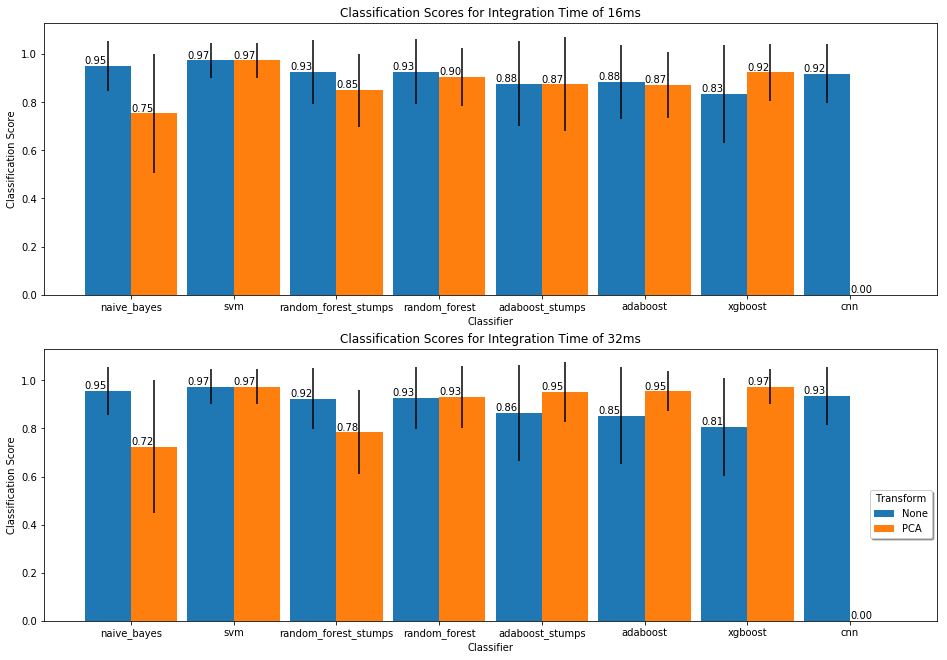

In [9]:
print('Results for Tests Run on All Growth Phase Data')

print('Top Configurations:\n', experiment_all.top_configurations(-1))
experiment_all.plot_results();